<a href="https://colab.research.google.com/github/mitcheljimenez/pattern-recog/blob/main/4-mlp_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación: Multilayer Perceptron y Support Vector Machines

En aprendizaje de máquinas, la clasificación es el problema de identificar a qué clase (de un grupo finito de clases) una observación nueva pertenece, tomando como base un entrenamiento previo sobre un grupo de observaciones donde sí se conocían sus clases correspondientes.

In [1]:
import pandas as pd
import sklearn.linear_model # Algoritmos lineales como el Perceptron
import sklearn.neural_network # Perceptón multicapa
import sklearn.model_selection # Funciones para preprocesar nuestros datos
import sklearn.svm
import sklearn.metrics # Métricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Perceptrón

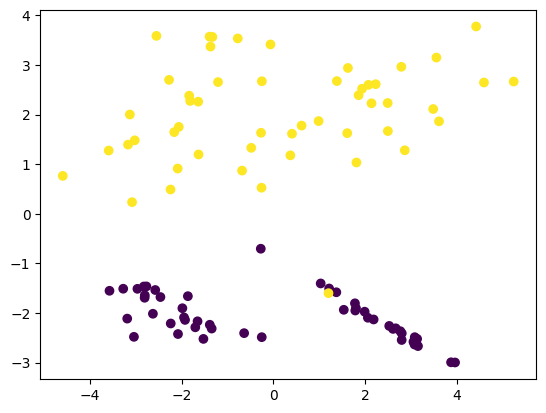

In [2]:
simplest = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/simplest.csv")
plt.scatter(
    simplest.x1,
    simplest.x2,
    c = simplest.y # Pintamos nuestros puntos según la etiqueta que tengan
)

## Preprocesamiento

Para poder evaluar los desempeños de nuestros modelos de la manera más válida posible, se suele dividir nuestro conjunto de datos un en subconjunto de entrenamiento y uno de prueba. El subconjunto de entrenamiento es el único que utilizaremos para entrenar nuestro modelo. El subconjunto de prueba es independiente al de entrenamiento y con este evaluamos las métricas de desempeño de nuestro modelo.

Para fácilemente realizar esta separación utilizamos la función `sklearn.model_selection.train_test_split()`

In [3]:
simplest_features = simplest.iloc[:,:-1] # Seleccionamos sólo las características de nuestro conjunto de datos
simplest_label = simplest.y
simplest_features_train, simplest_features_test, simplest_label_train, simplest_label_test = sklearn.model_selection.train_test_split(
    simplest_features,
    simplest_label,
    test_size=0.33, # Tamaño del conjunto de prueba
    random_state=11 # Bloqueamos el generador de números al azar con una semilla
)

Para evaluar el rendimiento de nuestro clasificador, calcularemos algunas métricas de clasificación sobre el subconjunto de entrenamiento utilizando la función `sklearn.metrics.classification_report()`

In [4]:
# Instanciamos nuestro perceptrón
p = sklearn.linear_model.Perceptron()
p.fit(
    simplest_features_train,
    simplest_label_train
)
print(sklearn.metrics.classification_report(
    simplest_label_test, # Etiquetas reales del conjunto de prueba
    p.predict(simplest_features_test) # Etiquetas predichas por el modelo
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



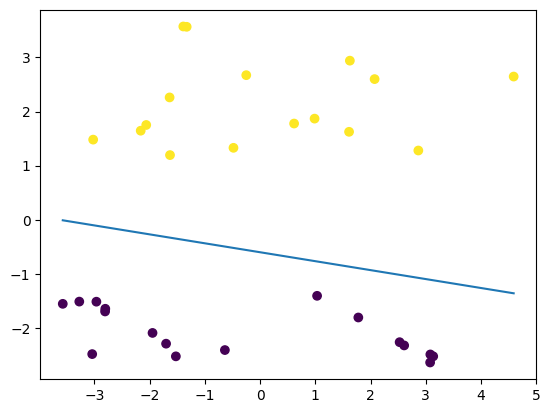

In [5]:
slope = -( p.intercept_ / p.coef_[0][1] ) / ( p.intercept_ / p.coef_[0][0] ) # Pendiente asociada al umbral de clasificación
intercept = -p.intercept_ / p.coef_[0][1] # Intercepto asociado al umbral de clasificación

# Calculemos 2 puntos para trazar una linea asociada al umbral de clasificación
db_x = np.array(
    [simplest_features_test.x1.min(),
    simplest_features_test.x1.max()]
)
db_y = slope * db_x + intercept

plt.scatter(simplest_features_test.x1,simplest_features_test.x2,c = simplest_label_test)
# Graficamos nuestro umbral de clasificación
plt.plot(db_x,db_y)

¿Y como se comporta para otra distribución de datos?

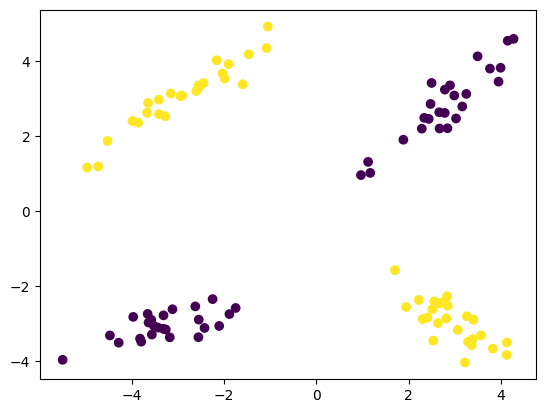

In [6]:
checkerboard = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/checkerboard.csv")
plt.scatter(checkerboard.x1,checkerboard.x2,c = checkerboard.y)

In [7]:
#Preprocesamiento y división de train/test
checkerboard_features = checkerboard.iloc[:,:-1]
checkerboard_label = checkerboard.y
checkerboard_features_train, checkerboard_features_test, checkerboard_label_train, checkerboard_label_test = sklearn.model_selection.train_test_split(
    checkerboard_features,
    checkerboard_label,
    test_size=0.33,
    random_state=11
)
#Ajustamos a un perceptrón
p1 = sklearn.linear_model.Perceptron()
p1.fit(checkerboard_features_train,checkerboard_label_train)
#Métricas
print(sklearn.metrics.classification_report(checkerboard_label_test,p1.predict(checkerboard_features_test)))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.56      0.67      0.61        15

    accuracy                           0.61        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.62      0.61      0.61        33



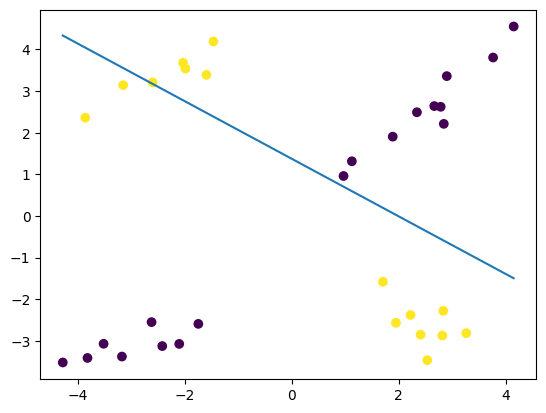

In [8]:
#Visualización
slope = -( p1.intercept_ / p1.coef_[0][1] ) / ( p1.intercept_ / p1.coef_[0][0] )  
intercept = -p1.intercept_ / p1.coef_[0][1]
db_x = np.array([checkerboard_features_test.x1.min(),checkerboard_features_test.x1.max()])
db_y = slope * db_x + intercept
plt.scatter(checkerboard_features_test.x1,checkerboard_features_test.x2,c = checkerboard_label_test)
plt.plot(db_x,db_y)
plt.show()

---
<img src='https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg' class="bg-primary mb-1" align="right" width="1000"/>

Para esta clase usaremos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), directamente desde las bases de datos almacenadas en Sklearn.

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data, target = load_breast_cancer(as_frame=True, return_X_y=True)
data[data.columns] = MinMaxScaler().fit_transform(data)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [10]:
# Dividimos nuestro conjunto de datos en subconjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    data,
    target,
    test_size=0.33, # Tamaño del conjunto de prueba
    random_state=11 # Bloqueamos el generador de números al azar con una semilla
)

Ajustaremos un único perceptrón para poder separar las clases de nuestros datos.

In [11]:
p = sklearn.linear_model.Perceptron() # Instanciamos nuestro perceptrón
p.fit(
    X_train,
    Y_train
) # Ajustamos el perceptrón con los datos de entrenamiento

Perceptron()

In [12]:
print(sklearn.metrics.classification_report(
    Y_test, # Etiquetas reales del conjunto de prueba
    p.predict(X_test) # Etiquetas predichas por el modelo
))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.98      0.94      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



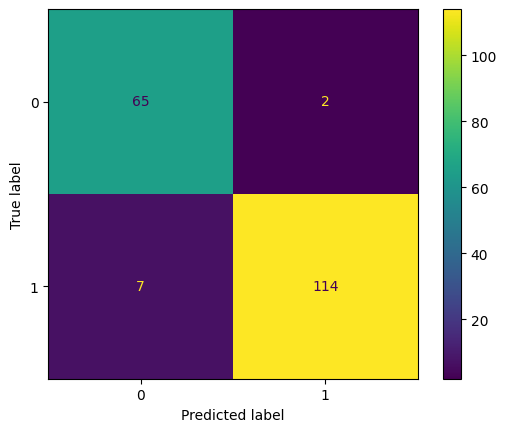

In [13]:
#Veamos la matriz de confusión
cm = sklearn.metrics.confusion_matrix(Y_test,p.predict(X_test))
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Exploremos los parámetros ajustados de nuestro perceptrón

In [14]:
#Aporte de cada parámetro
df = pd.DataFrame({"name":p.feature_names_in_, "value":p.coef_[0]})
df.sort_values(by = "value")

,name,value
21,worst texture,-4.918443
10,radius error,-4.642260
7,mean concave points,-4.331610
27,worst concave points,-4.260687
28,worst symmetry,-4.078849
20,worst radius,-3.976521
12,perimeter error,-3.569759
22,worst perimeter,-3.556651
23,worst area,-3.503416
24,worst smoothness,-3.454666


## Actividad 1

Los resultados son considerablemente buenos, sin embargo. ¿Se puede añadir más perceptrones?¿Se mejora los resultados?

A continuación trabajaremos con un clasificador de multiples capas de perceptrones (*Multi-layer Perceptron classifier* o [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)), el cual nos permitirá adaptar la cantidad de perceptrones, capas, función de activación y otros parámetros.

Algo interesante: [MLP Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.38047&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



In [24]:
X_train.shape

(381, 30)

In [83]:
# TODO: Código para perceptrones múltiples para clasificar.
# HINT: Documentación del perceptrón multicapa https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = sklearn.neural_network.MLPClassifier(solver='lbfgs', random_state=1)

mlp.fit(X_train, Y_train)

MLPClassifier(random_state=1, solver='lbfgs')

Y aquí predecimos y mostramos las métricas de clasificación


In [85]:
mlpPredictions = mlp.predict(X_test)

print(sklearn.metrics.classification_report(
    Y_test,
    mlpPredictions
))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.96      0.97      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



Vemos la matriz de confusión

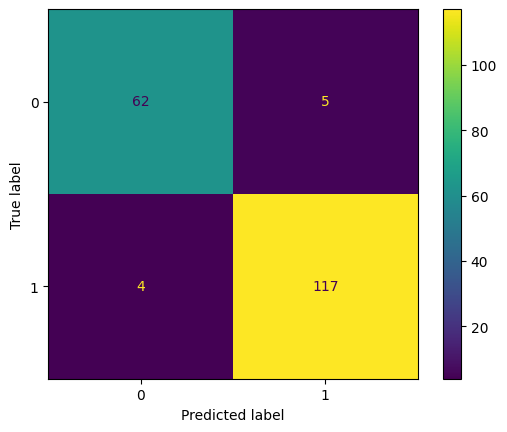

In [86]:
cm = sklearn.metrics.confusion_matrix(Y_test, mlpPredictions)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Support Vector Machines

Ajustamos un modelo de SVM lineal sobre nuestros datos `checkerboard`

In [49]:
# Instanciamos nuestra svm lineal
svm = sklearn.svm.SVC(
    kernel="linear" # utlizamos un kernel lineal
    ) 

# Ajustamos el perceptrón con los datos de entrenamiento
svm.fit(
    checkerboard_features_train,
    checkerboard_label_train
) 

#Métricas de evaluación
print(sklearn.metrics.classification_report(
    checkerboard_label_test,
    svm.predict(checkerboard_features_test)
))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.60      1.00      0.75        15

    accuracy                           0.70        33
   macro avg       0.80      0.72      0.68        33
weighted avg       0.82      0.70      0.68        33



Se puede observar que el rendimiento no es muy bueno.

In [50]:
# Funciones para mostrar los umbrales de SVM sobre nuestros datos

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Visualizamos cómo se ve el umbral de clasificación del SVM lineal.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


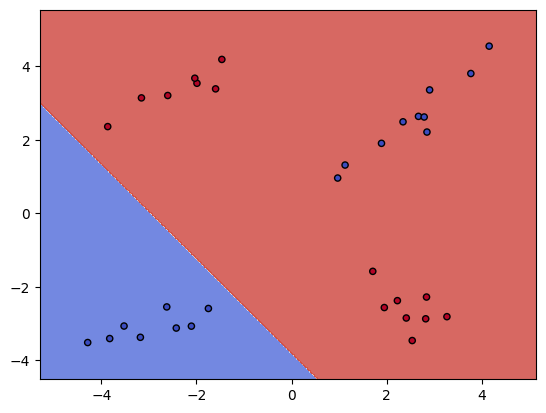

In [51]:
fig, ax = plt.subplots()
X0, X1 = checkerboard_features_test.x1, checkerboard_features_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=checkerboard_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

## Actividad 2

Utilice un kernel no lineal para entrenar otro modelo de SVM, calcule las métricas de clasificación asociadas a este nuevo modelo y visualice los umbrales de clasificación.

Hint: [LINK](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [61]:
# Instanciamos nuestra svm lineal
svm = sklearn.svm.SVC(
    kernel="rbf"
    ) 

# Ajustamos el SVM con los datos de entrenamiento
svm.fit(
    checkerboard_features_train,
    checkerboard_label_train
) 

#Métricas de evaluación
print(sklearn.metrics.classification_report(
    checkerboard_label_test,
    svm.predict(checkerboard_features_test)
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



(67,)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


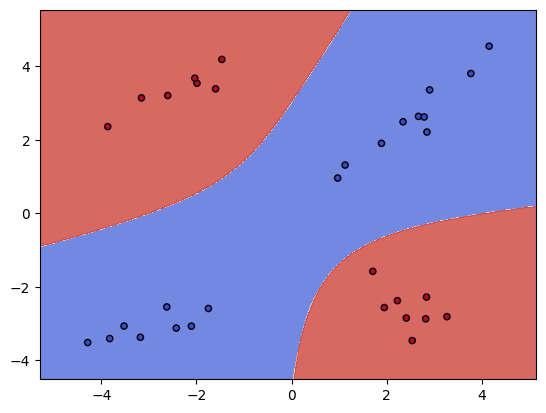

In [57]:
fig, ax = plt.subplots()
X0, X1 = checkerboard_features_test.x1, checkerboard_features_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=checkerboard_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

# Actividad 3

Típicamente para comparar modelos se utiliza la validación cruzada para poder disminuir el sesgo de selección de datos. Utilice la función `sklearn.model_selection.cross_val_score()` para obtener el rendimiento promedio (debe seleccionar la métrica a comparar) de MLP y SVM sobre el conjunto inicialde datos de cáncer de mama y evalúe qué método se desempeña mejor.


<img src='https://i0.wp.com/sqlrelease.com/wp-content/uploads/2021/07/K-fold-cross-validation-1.jpg?ssl=1' class="bg-primary mb-1" align="right" width="700"/>

In [87]:
svm = sklearn.svm.SVC(
    kernel="rbf"
) 

mlp = sklearn.neural_network.MLPClassifier()

scoring = 'precision'
seed = 7
kfold = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

cv_results_mlp = sklearn.model_selection.cross_val_score(mlp, data, target, cv=kfold, scoring=scoring)
cv_results_svm = sklearn.model_selection.cross_val_score(svm, data, target)


print(cv_results_mlp, cv_results_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[1.         0.95238095 0.95348837 1.         0.97142857 0.94285714
 1.         0.94444444 0.9375     1.        ] [0.96491228 0.96491228 0.99122807 0.96491228 0.98230088]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


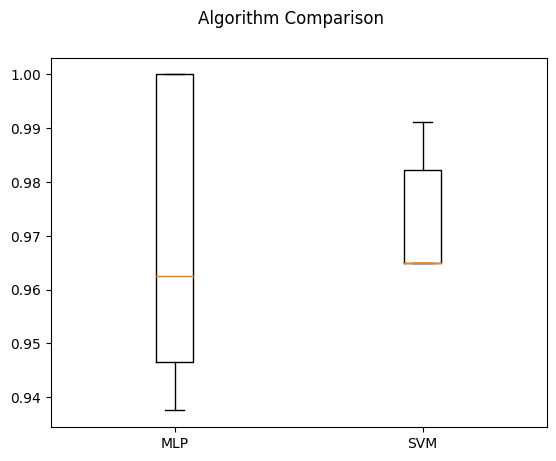

In [88]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

results = []

results.append(cv_results_mlp)
results.append(cv_results_svm)

plt.boxplot(results)

names = ['MLP', 'SVM']

ax.set_xticklabels(names)
plt.show()